In [9]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
#Load Dataset

df = pd.read_csv('/content/silver_forecast_2026.csv')
print("DataFrame loaded successfully. Displaying the first 5 rows:")
print(df)

DataFrame loaded successfully. Displaying the first 5 rows:
            Date  Predicted_Price  Lower_Bound  Upper_Bound
0     2016-01-04        17.822103    11.044640    24.036777
1     2016-01-05        17.940847    10.976226    24.618454
2     2016-01-06        17.948592    11.025532    24.220555
3     2016-01-07        17.878666    11.223053    24.791605
4     2016-01-08        17.963916    11.513641    24.751113
...          ...              ...          ...          ...
2590  2026-03-27        52.887590    45.967148    59.731456
2591  2026-03-28        52.148167    45.343853    58.790640
2592  2026-03-29        52.217632    45.970667    59.360590
2593  2026-03-30        53.081034    46.467872    59.754963
2594  2026-03-31        53.216453    46.343932    59.933741

[2595 rows x 4 columns]


In [14]:
#Basic Dataset Information


print("\nDataset Shape (Rows, Columns):")
print(df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)


Dataset Shape (Rows, Columns):
(2595, 4)

Column Names:
Index(['Date', 'Predicted_Price', 'Lower_Bound', 'Upper_Bound'], dtype='object')

Data Types:
Date                object
Predicted_Price    float64
Lower_Bound        float64
Upper_Bound        float64
dtype: object


In [15]:
#Clean Column Names


df.columns = df.columns.str.strip().str.replace(" ", "_")

print("\nCleaned Column Names:")
print(df.columns)


Cleaned Column Names:
Index(['Date', 'Predicted_Price', 'Lower_Bound', 'Upper_Bound'], dtype='object')


In [16]:
#Missing Values Analysis

print("\nChecking Missing Values:")
missing = df.isnull().sum()
print(missing)

print("\nColumns with Missing Values:")
print(missing[missing > 0])



Checking Missing Values:
Date               0
Predicted_Price    0
Lower_Bound        0
Upper_Bound        0
dtype: int64

Columns with Missing Values:
Series([], dtype: int64)


In [17]:
#Unique Values Analysis

print("\nUnique Values Analysis:")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"\nColumn '{column}':")
    print(f"Number of unique values: {unique_count}")
    if unique_count <= 10:
        print(f"Unique values: {df[column].unique().tolist()}")
    else:
        print("More than 10 unique values (displaying count only).")


Unique Values Analysis:

Column 'Date':
Number of unique values: 2595
More than 10 unique values (displaying count only).

Column 'Predicted_Price':
Number of unique values: 2595
More than 10 unique values (displaying count only).

Column 'Lower_Bound':
Number of unique values: 2595
More than 10 unique values (displaying count only).

Column 'Upper_Bound':
Number of unique values: 2595
More than 10 unique values (displaying count only).


In [18]:
#Duplicate Records


duplicates = df.duplicated().sum()
print("\nTotal Duplicate Rows:", duplicates)

df = df.drop_duplicates()
print("Duplicates Removed Successfully!")
print("New Dataset Shape:", df.shape)


Total Duplicate Rows: 0
Duplicates Removed Successfully!
New Dataset Shape: (2595, 4)


In [19]:
#Summary Statistics


print("\nSummary Statistics of Numerical Columns:")
print(df.describe())


Summary Statistics of Numerical Columns:
       Predicted_Price  Lower_Bound  Upper_Bound
count      2595.000000  2595.000000  2595.000000
mean         23.609471    16.878704    30.344584
std           9.425683     9.419517     9.423952
min          14.630347     7.219716    21.074583
25%          16.758370    10.067182    23.501859
50%          21.674877    14.917509    28.399828
75%          25.048388    18.362383    31.805747
max          53.216453    46.586317    60.134510



Plotting distributions for numerical columns:


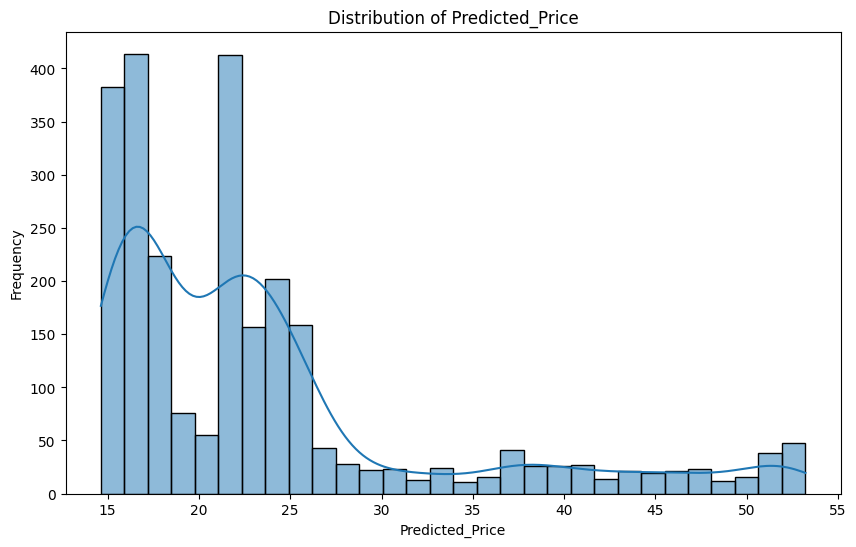

Predicted_Price Distribution Chart Displayed.


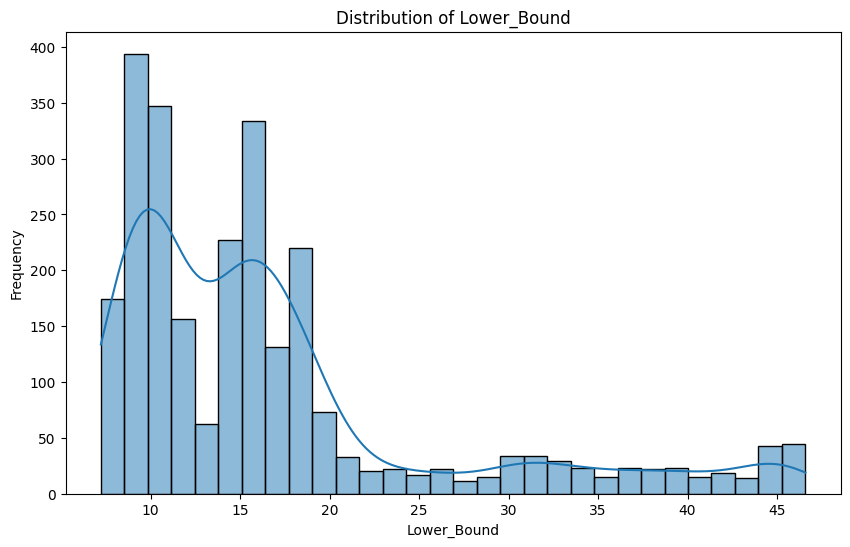

Lower_Bound Distribution Chart Displayed.


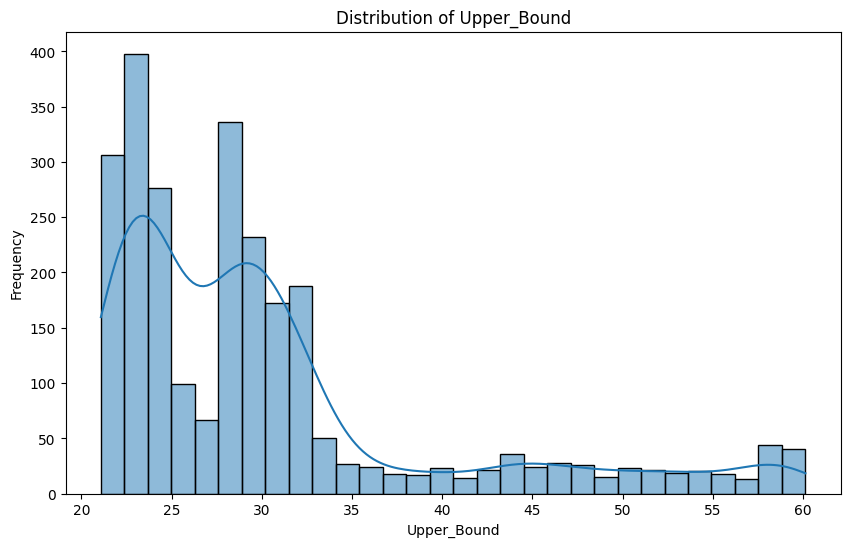

Upper_Bound Distribution Chart Displayed.


In [22]:
#Price Distribution

print("\nPlotting distributions for numerical columns:")

numerical_cols = ['Predicted_Price', 'Lower_Bound', 'Upper_Bound']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(f"{col} Distribution Chart Displayed.")


Showing First 5 Sorted Dates and Predicted Prices:
        Date  Predicted_Price
0 2016-01-04        17.822103
1 2016-01-05        17.940847
2 2016-01-06        17.948592
3 2016-01-07        17.878666
4 2016-01-08        17.963916


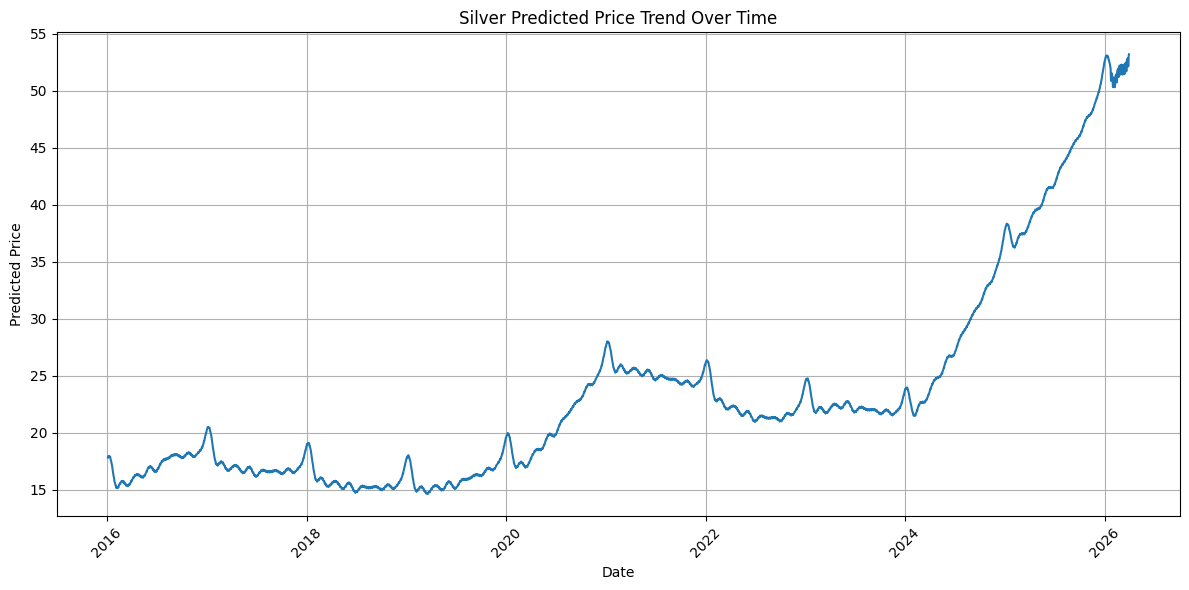

Time Trend Chart Displayed.


In [24]:
#Time Trend Analysis

if 'Date' in df.columns and 'Predicted_Price' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df_sorted = df.sort_values('Date')

    print("\nShowing First 5 Sorted Dates and Predicted Prices:")
    print(df_sorted[['Date','Predicted_Price']].head())

    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['Date'], df_sorted['Predicted_Price'])
    plt.title("Silver Predicted Price Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Time Trend Chart Displayed.")
else:
    print("\nDate or Predicted_Price column missing for trend analysis.")


Monthly Average Predicted Price:
Month
1     25.761574
2     24.885292
3     24.866532
4     21.678428
5     21.631717
6     21.949354
7     22.686951
8     22.728590
9     23.399725
10    23.839220
11    23.838896
12    25.643159
Name: Predicted_Price, dtype: float64


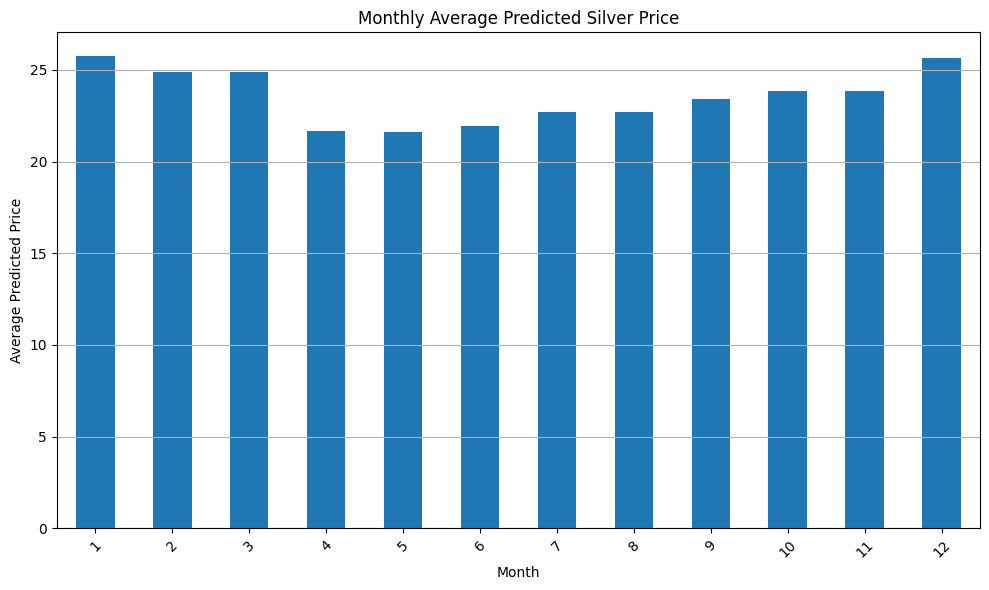

Monthly Average Chart Displayed.


In [26]:
#Monthly Average Predicted Price

if 'Date' in df.columns and 'Predicted_Price' in df.columns:
    # Ensure 'Date' is datetime type
    df['Date'] = pd.to_datetime(df['Date'])
    # Extract month for grouping
    df['Month'] = df['Date'].dt.month

    monthly_avg = df.groupby('Month')['Predicted_Price'].mean()

    print("\nMonthly Average Predicted Price:")
    print(monthly_avg)

    plt.figure(figsize=(10, 6))
    monthly_avg.plot(kind='bar')
    plt.title("Monthly Average Predicted Silver Price")
    plt.xlabel("Month")
    plt.ylabel("Average Predicted Price")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print("Monthly Average Chart Displayed.")
else:
    print("\nDate or Predicted_Price column missing for monthly average analysis.")

**Reasoning**:
To perform correlation analysis, I will first select the numerical columns from the DataFrame, calculate their correlation matrix, and then visualize it using a seaborn heatmap. I will ensure the correlation values are annotated on the heatmap for clarity.




Generating Correlation Matrix...

Correlation Matrix:
                 Predicted_Price  Lower_Bound  Upper_Bound     Month
Predicted_Price         1.000000     0.999526     0.999522 -0.011804
Lower_Bound             0.999526     1.000000     0.999095 -0.010913
Upper_Bound             0.999522     0.999095     1.000000 -0.010769
Month                  -0.011804    -0.010913    -0.010769  1.000000


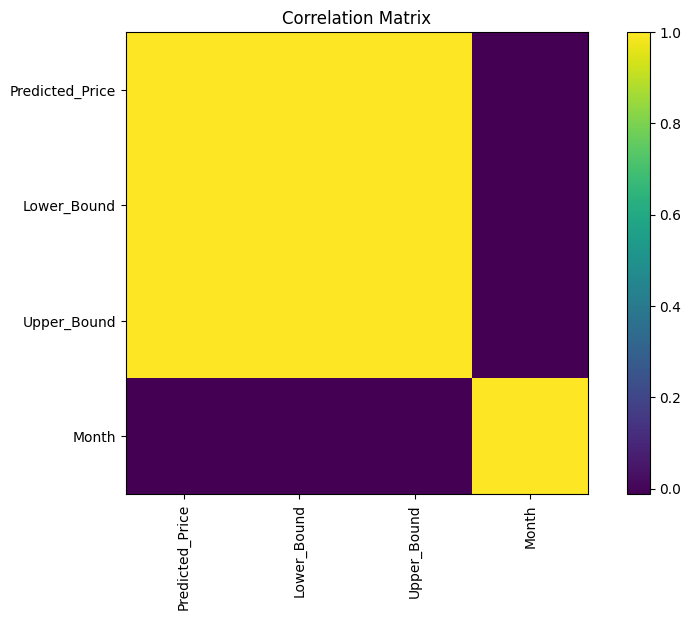

Correlation Chart Displayed.


In [27]:
#Correlation Analysis


print("\nGenerating Correlation Matrix...")

numeric_df = df.select_dtypes(include=np.number)

if numeric_df.shape[1] > 1:
    correlation_matrix = numeric_df.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    plt.imshow(correlation_matrix)
    plt.colorbar()
    plt.title("Correlation Matrix")
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

    print("Correlation Chart Displayed.")
else:
    print("Not enough numeric columns for correlation.")

In [29]:
#Save Cleaned Dataset


from google.colab import files

df.to_csv("Cleaned_Silver_Forecast_2026.csv", index=False)
print("\nCleaned Dataset Saved Successfully!")

files.download("Cleaned_Silver_Forecast_2026.csv")


Cleaned Dataset Saved Successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>